<a href="https://colab.research.google.com/github/ShantanuDhadwe/FMML_Project_and_Labs/blob/main/MODULE4_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [2]:
#ax^2+bc+c
def eval_2nd_degree(coeffs,x):
  a = coeffs[0]*(x*x)
  b= coeffs[1]*(x)
  c = coeffs[2]
  y = a+b+c
  return y
hundred_xs = np.random.uniform(-10,10,100)#generates 100 nos betn -10 to 10
coeffs = [1,0,0]
xs= []
ys=[]
for x in hundred_xs:
  y= eval_2nd_degree(coeffs,x)
  xs.append(x)
  ys.append(y)

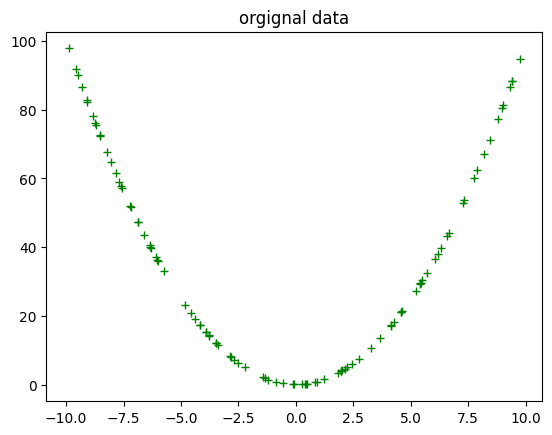

In [3]:
plt.plot(xs,ys,'g+')
plt.title('orgignal data')
plt.show()

In [4]:
def eval_2nd_degree_jitter(coeffs,x,j):
  a = coeffs[0]*(x*x)
  b = coeffs[1]*(x)
  c = coeffs[2]
  y = a+b+c

  interval = [y-j,y+j]
  interval_min = interval[0]
  interval_max = interval[1]
  jit_val = random.random() * interval_max
  while interval_min>jit_val:
    jit_val=random.random() *interval_max
  return jit_val

xs=[]
ys=[]
for x in hundred_xs:
  y = eval_2nd_degree_jitter(coeffs,x,0.1)
  xs.append(x)
  ys.append(y)

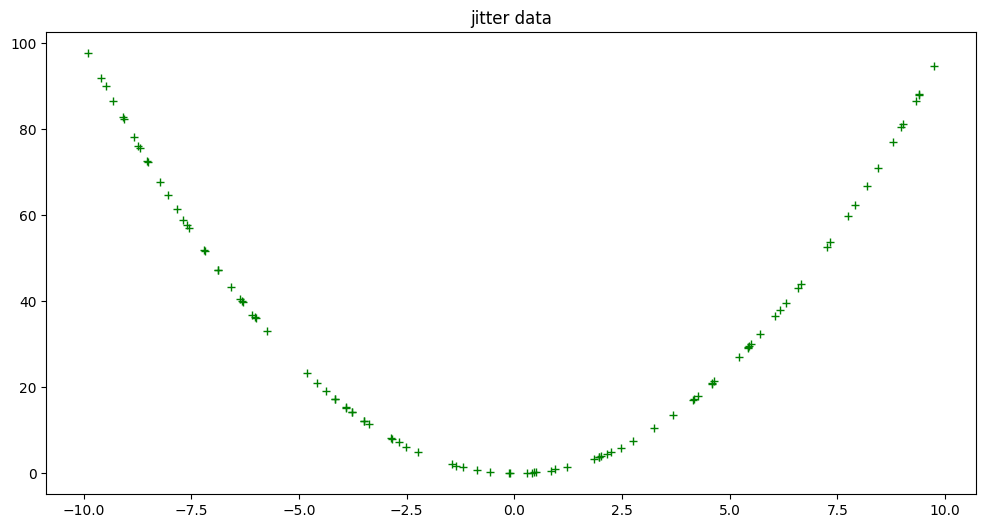

In [5]:
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+')
plt.title('jitter data')
plt.show()

In [6]:
#mean squared loss
def loss_mse(ys,y_bar):
  return sum((ys-y_bar)*(ys-y_bar)/len(ys))

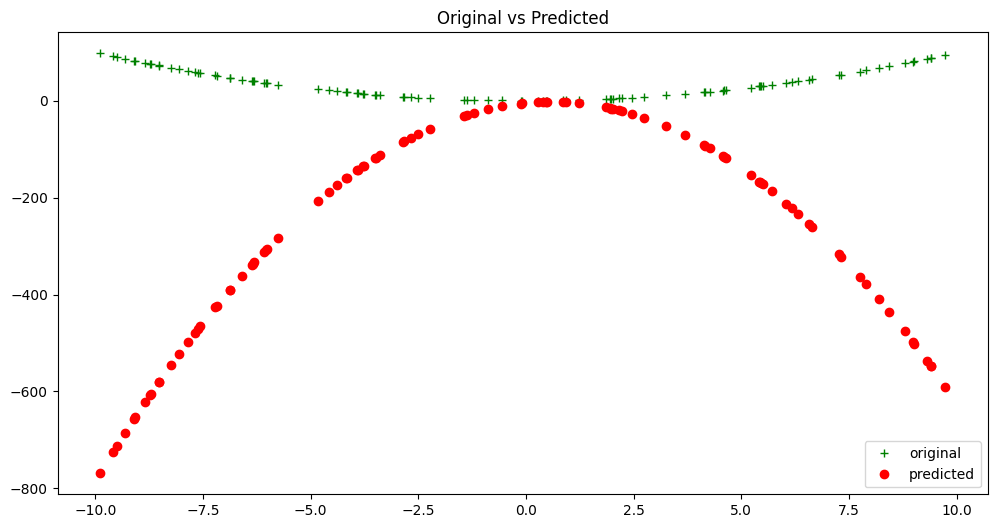

In [7]:
rand_coeffs = (random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10))
y_bar = eval_2nd_degree(rand_coeffs,hundred_xs)
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,y_bar,'ro',label='predicted')
plt.title('Original vs Predicted')
plt.legend(loc='lower right')
plt.show()

In [8]:
LOSS = loss_mse(ys,y_bar)
LOSS

146807.86204726345

In [9]:
def calc_gradient_2nd_poly(rand_coeffs,hundred_xs,ys):
  a_s =[]
  b_s =[]
  c_s =[]

  y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

  for x,y, y_bar in list(zip(hundred_xs, ys, y_bars)):#zip coverts it into tuple
    x_squared = x ** 2
    partial_a = x_squared * (y - y_bar)
    a_s.append(partial_a)
    partial_b = x * (y - y_bar)
    b_s.append(partial_b)
    partial_c = (y - y_bar)
    c_s.append(partial_c)

  num = [i for i in y_bars] #editing num wont affect y_bars but using '=' will affect
  n = len(num)

  gradient_a =(-2/n)*sum(a_s)
  gradient_b = (-2/n)*sum(b_s)
  gradient_c = (-2/n)*sum(c_s)
  return (gradient_a, gradient_b, gradient_c)

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs,hundred_xs,ys)

lr = 0.0001
a_new = rand_coeffs[0]-lr*calc_grad[0]
b_new = rand_coeffs[1]-lr*calc_grad[1]
c_new = rand_coeffs[2]-lr*calc_grad[2]

new_model_coeffs = (a_new,b_new,c_new)
print(f"New model coeffs:{new_model_coeffs}")

new_y_bar= eval_2nd_degree(new_model_coeffs,hundred_xs)
updated_model_loss = loss_mse(ys,new_y_bar)

print(f"Now moedl loss reduced:{updated_model_loss}")

New model coeffs:(-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now moedl loss reduced:49608.17214485427


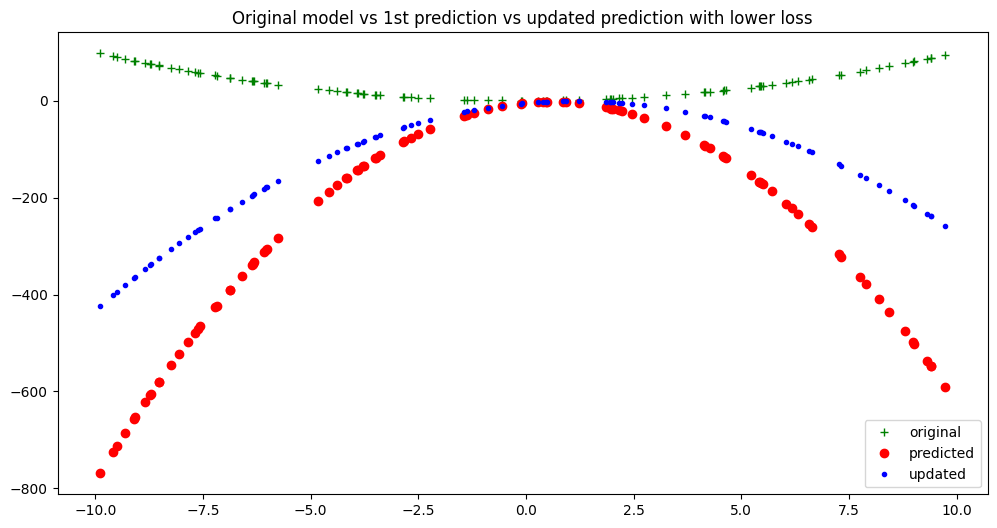

In [11]:
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,y_bar,'ro',label='predicted')
plt.plot(xs,new_y_bar,'b.',label='updated')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc='lower right')
plt.show()

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs,lr):
  losses = []
  rand_coeff_to_test = rand_coeffs
  for i in range(epochs):
    loss=  calc_gradient_2nd_poly_for_GD(rand_coeff_to_test,hundred_xs,ys,lr)
    rand_coeffs_to_test = loss[1]
    losses.append(loss[0])
  print(losses)
  return loss[0],loss[1],loss[2],losses

In [14]:
GD = gradient_descent(30000,0.0003)

[13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463711651, 13475.62463

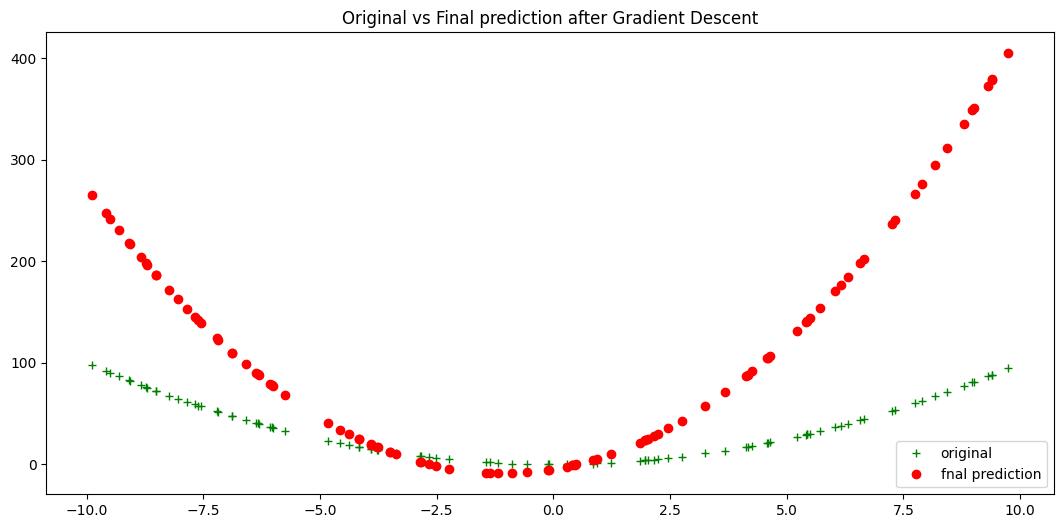

In [15]:
plt.figure(figsize=(13,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,GD[2],'ro',label='fnal prediction')
plt.title("Original vs Final prediction after Gradient Descent")
plt.legend(loc='lower right')
plt.show()

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (3.538377544278923, 7.637447170685549, -4.824216221100784)
Original Coefficients: [1, 0, 0]


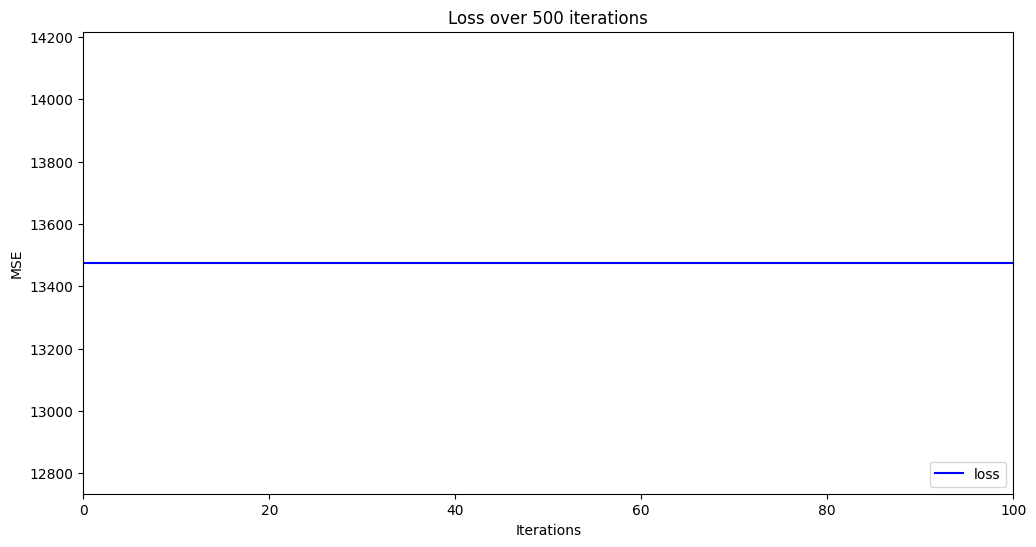

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

**Things to try**
1) Change the coefficients array and try a different polynomial instead of our  x2

In [18]:
def eval_1st_degree(coeffs,x):
  a = coeffs[0]*(x*x)
  b= coeffs[1]*(x)
  c = coeffs[2]
  y = a+b+c
  return y
hundred_xs = np.random.uniform(-10,10,100)#generates 100 nos betn -10 to 10
coeffs = [0,1,0]
xs= []
ys=[]
for x in hundred_xs:
  y= eval_2nd_degree(coeffs,x)
  xs.append(x)
  ys.append(y)

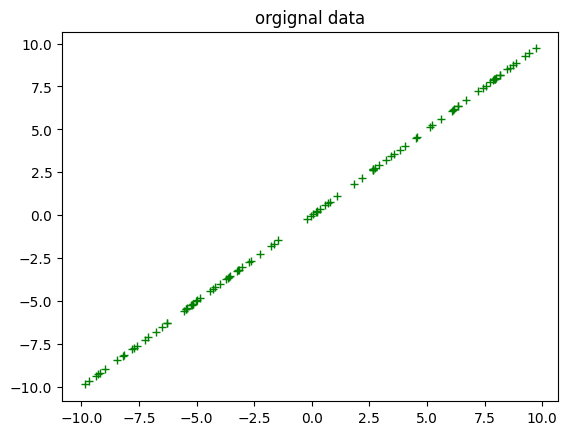

In [19]:
plt.plot(xs,ys,'g+')
plt.title('orgignal data')
plt.show()

**Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

[136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462, 136284809353.34462,

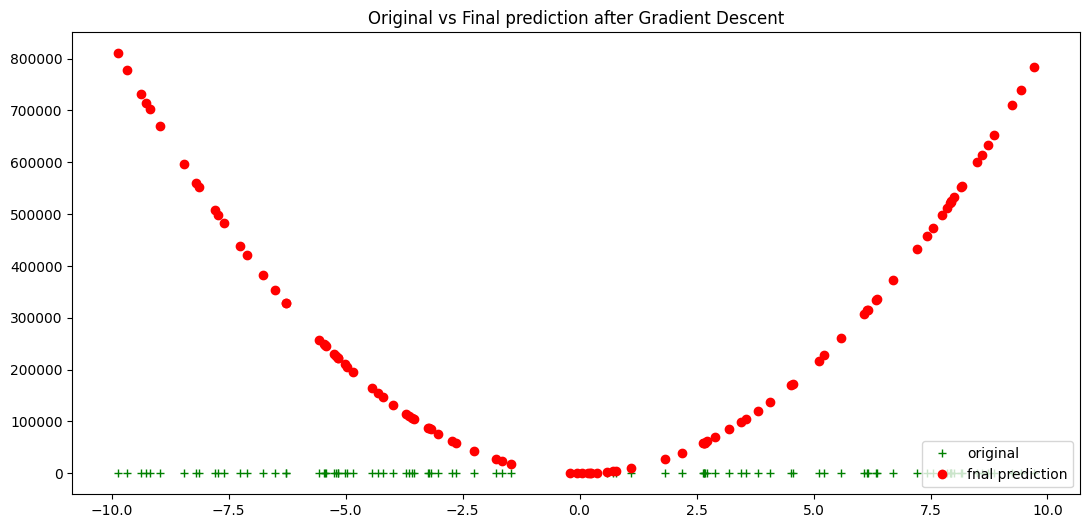

In [20]:
GD = gradient_descent(30000,0.3)
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")
plt.figure(figsize=(13,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,GD[2],'ro',label='fnal prediction')
plt.title("Original vs Final prediction after Gradient Descent")
plt.legend(loc='lower right')
plt.show()

for high value graph crosess the actual values due to high learning rate

**3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?**

In [ ]:
#ax^5+bx^4+cx^3+dx^2+ex+f
def eval_2nd_degree(coeffs,x):
  a = coeffs[0]*(pow(x,5))
  b= coeffs[1]*(pow(x,4))
  c = coeffs[2]*(pow(x,3))
  d = coeffs[3]*(pow(x,2))
  e= coeffs[4]*(pow(x,1))
  f = coeffs[5]
  y = a+b+c+d+e+f
  return y
hundred_xs = np.random.uniform(-10,10,100)#generates 100 nos betn -10 to 10
coeffs = [1,0,0]
xs= []
ys=[]
for x in hundred_xs:
  y= eval_2nd_degree(coeffs,x)
  xs.append(x)
  ys.append(y)

**Can you modify the algorithm to find a maxima of a function, instead of a minima?**

yes we can certainly find maxima of a function by changing the update rule to
θn+1=θn + α∇J(θn)


In [21]:
def calc_gradient_find_maxima(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] + lr * gradient_a
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar